In this notebook, let us try and explore the price history of different cryptocurrencies.

We shall first import the necessary modules and then list the input files.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


FileNotFoundError: [WinError 2] The system cannot find the file specified

**Bitcoin**

We shall first explore the "bitcoin" as it is the market leader in this space.

In [ ]:
df = pd.read_csv("../input/bitcoin_price.csv", parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,2017-08-06,3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,2017-08-03,2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"


First let us plot the closing value of Bitcoin and observe how the price has changed over time.

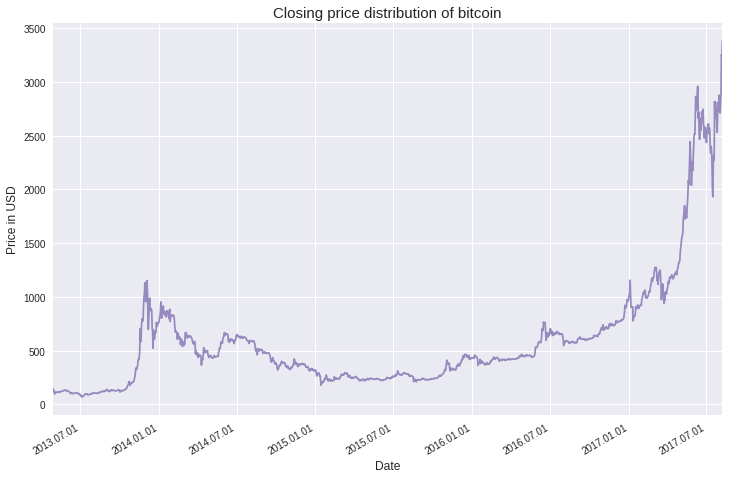

In [ ]:
import matplotlib.dates as mdates
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

Looks like there seems to be a spike in early 2014 and then there is a huge raise this year from 1000 USD to more than 3000 USD.

Candlestick charts are very famous in financial world. So let us try and plot the bicoin price using that.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


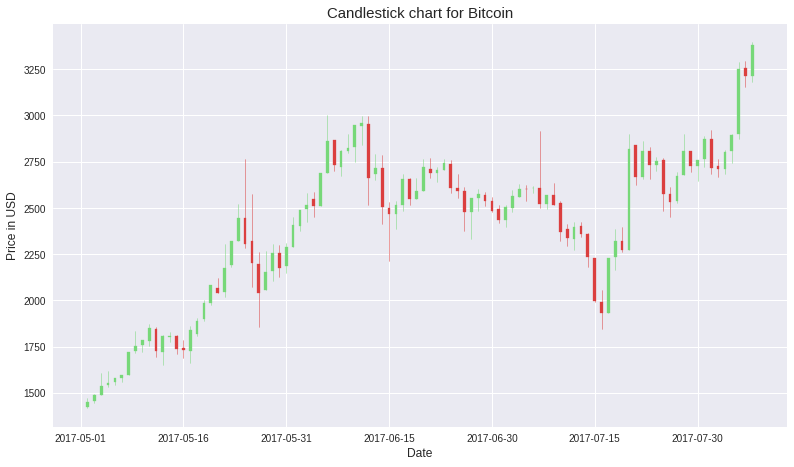

In [ ]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Date']>'2017-05-01']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

Now we can make a generic code to create charts when given an input file. Please change the "INPUT_FILE" variable and get the historical price charts for the currency of your choice.

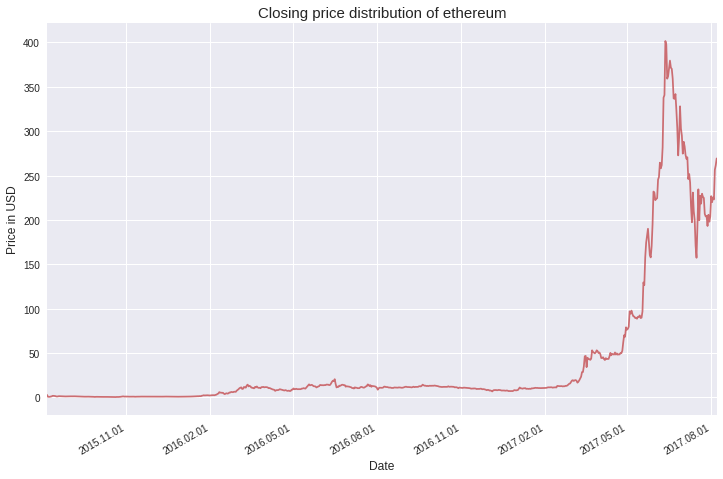

In [ ]:
INPUT_FILE = "ethereum_price.csv"

currency_name = INPUT_FILE.split("_")[0]
df = pd.read_csv("../input/" + INPUT_FILE, parse_dates=['Date'])
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of "+currency_name, fontsize=15)
plt.show()

Now let us build a heat map using correlation to see how the price of different currencies change with respect to each other.

Please add / delete the file names in "files_to_use" variable to check the correlation of different crypto currencies.

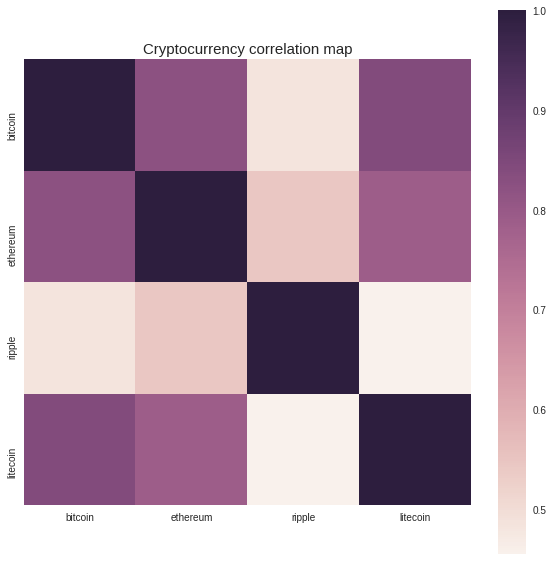

In [ ]:
files_to_use = ["bitcoin_price.csv", "ethereum_price.csv", "ripple_price.csv", "litecoin_price.csv"]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[0]
    if ind == 0:
        df = pd.read_csv("../input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("../input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df.head()
        
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()

**Future Price Prediction:**

Now that we have explored the dataset, one possible next step could be to predict the future price of the currency. We could use the Propher library of facebook here to do the predictions. 

Please modify the "INPUT_FILE" variable to make predictions for other currencies.

In [ ]:
INPUT_FILE = "bitcoin_price.csv"

from fbprophet import Prophet
df = pd.read_csv("../input/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1588,2017-09-02,2874.994803,2720.676636,3004.735757
1589,2017-09-03,2882.713427,2744.824775,3027.943193
1590,2017-09-04,2896.231433,2761.342752,3042.142035
1591,2017-09-05,2903.532508,2755.986460,3050.623404
1592,2017-09-06,2909.406586,2761.491024,3062.422282


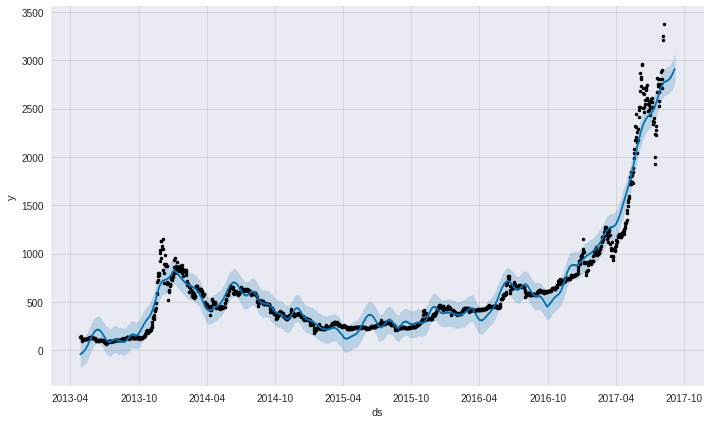

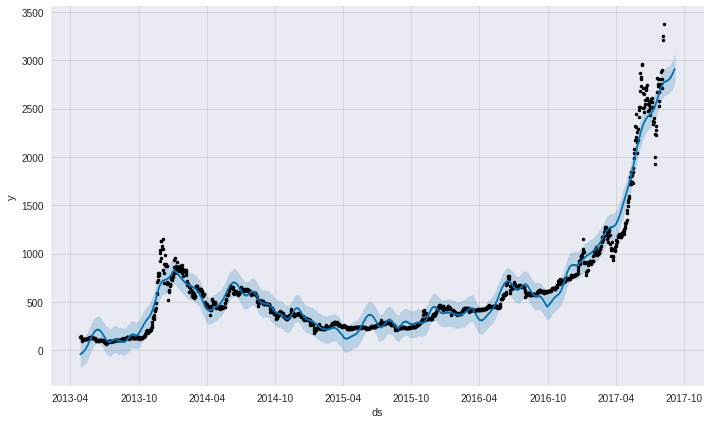

In [ ]:
m.plot(forecast)

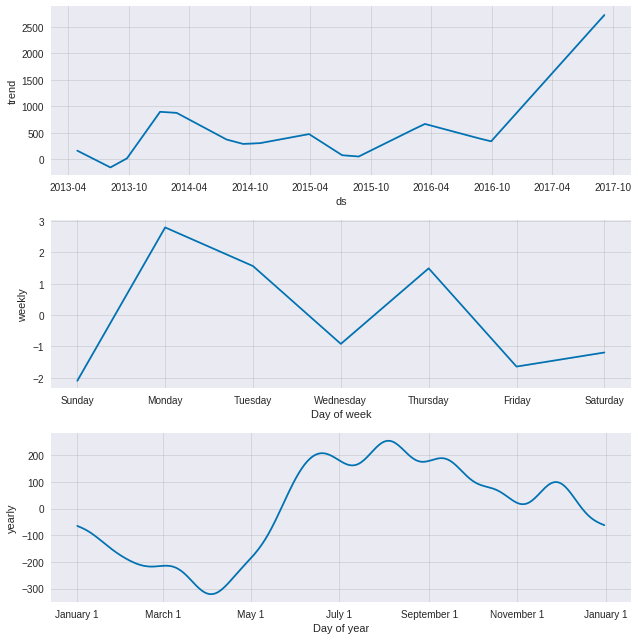

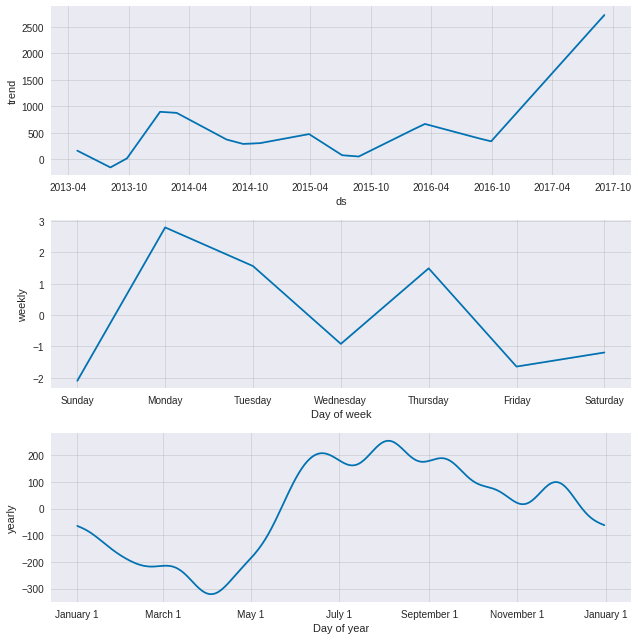

In [ ]:
m.plot_components(forecast)

Hope this is helpful.!